In [60]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical


In [52]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [53]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [54]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


In [55]:
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

In [57]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=5, batch_size=64,
                    validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.8620 - loss: 0.4651 - val_accuracy: 0.9818 - val_loss: 0.0635
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9811 - loss: 0.0624 - val_accuracy: 0.9838 - val_loss: 0.0554
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9890 - val_loss: 0.0388
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9909 - loss: 0.0279 - val_accuracy: 0.9885 - val_loss: 0.0429
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9912 - val_loss: 0.0330


In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9871 - loss: 0.0379
Test accuracy: 0.9903


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


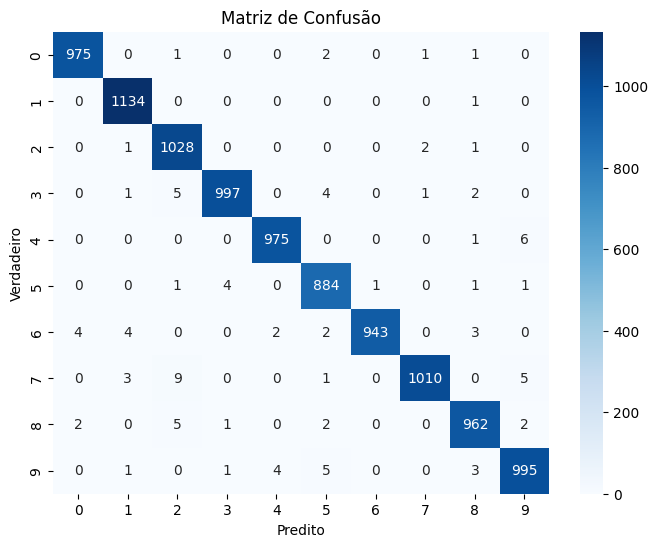

In [61]:
y_score = model.predict(test_images)
y_pred = np.argmax(y_score, axis=1)

# Matriz de confusão
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

Recall (classe 0): 0.9949
Recall (classe 1): 0.9991
Recall (classe 2): 0.9961
Recall (classe 3): 0.9871
Recall (classe 4): 0.9929
Recall (classe 5): 0.9910
Recall (classe 6): 0.9843
Recall (classe 7): 0.9825
Recall (classe 8): 0.9877
Recall (classe 9): 0.9861


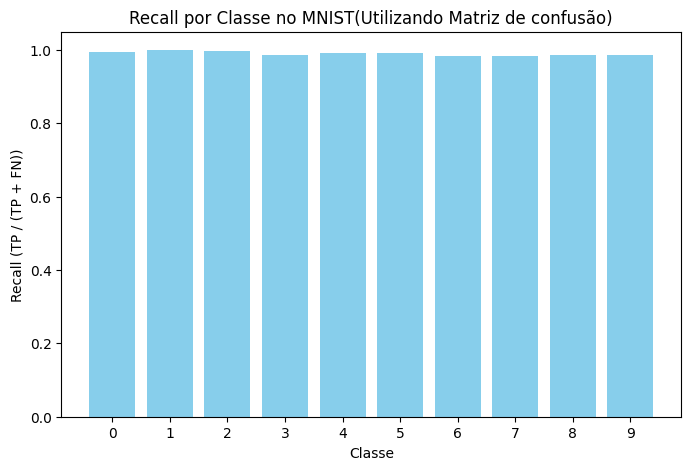

In [70]:
#Recall(calculo de sensibilidade)
recall_per_class = []

for i in range(10):
    TP = cm[i, i]  # cm = Matriz de confusão   // TP para a classe i é o valor cm[i, i] (diagonal principal).
    FN = cm[i, :].sum() - TP #
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    recall_per_class.append(recall)
    print(f"Recall (classe {i}): {recall:.4f}")

plt.figure(figsize=(8,5))
plt.bar(range(10), recall_per_class, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Recall (TP / (TP + FN))')
plt.title('Recall por Classe no MNIST(Utilizando Matriz de confusão)')
plt.xticks(range(10))
plt.ylim(0,1.05)
plt.show()


Especificidade (classe 0): 0.9993
Especificidade (classe 1): 0.9989
Especificidade (classe 2): 0.9977
Especificidade (classe 3): 0.9993
Especificidade (classe 4): 0.9993
Especificidade (classe 5): 0.9982
Especificidade (classe 6): 0.9999
Especificidade (classe 7): 0.9996
Especificidade (classe 8): 0.9986
Especificidade (classe 9): 0.9984


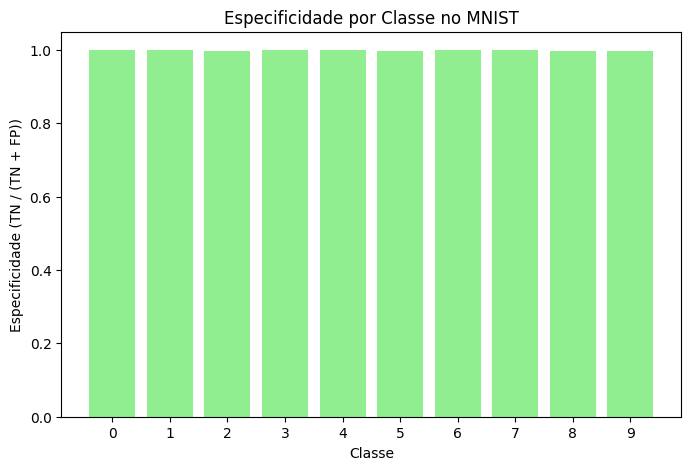

In [71]:
#Especificidade()
especificidade_per_class = []

total = cm.sum()

for i in range(10):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP # soma da linha i menos TP
    FP = cm[:, i].sum() - TP
    TN = total - (TP + FN + FP)
    especificidade = TN / (TN + FP) if (TN + FP) > 0 else 0
    especificidade_per_class.append(especificidade)
    print(f"Especificidade (classe {i}): {especificidade:.4f}")

# Plot opcional
plt.figure(figsize=(8,5))
plt.bar(range(10), especificidade_per_class, color='lightgreen')
plt.xlabel('Classe')
plt.ylabel('Especificidade (TN / (TN + FP))')
plt.title('Especificidade por Classe no MNIST')
plt.xticks(range(10))
plt.ylim(0,1.05)
plt.show()


Acurácia (classe 0): 0.9989
Acurácia (classe 1): 0.9989
Acurácia (classe 2): 0.9975
Acurácia (classe 3): 0.9981
Acurácia (classe 4): 0.9987
Acurácia (classe 5): 0.9976
Acurácia (classe 6): 0.9984
Acurácia (classe 7): 0.9978
Acurácia (classe 8): 0.9975
Acurácia (classe 9): 0.9972


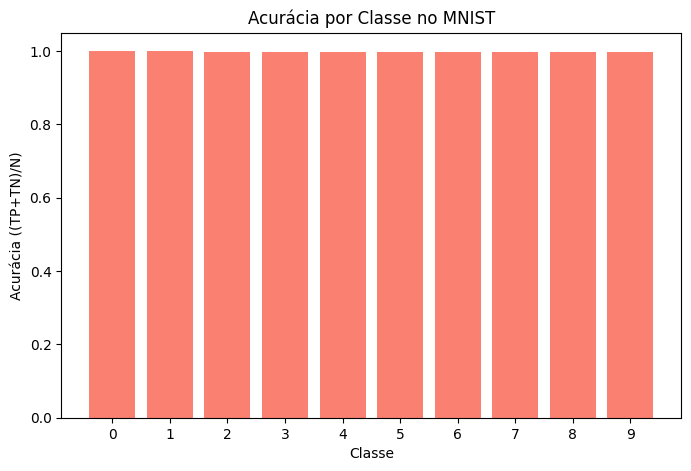

In [73]:
#Acuracia

accuracy_per_class = []
total = cm.sum()

for i in range(10):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = total - (TP + FN + FP)
    accuracy = (TP + TN) / total
    accuracy_per_class.append(accuracy)
    print(f"Acurácia (classe {i}): {accuracy:.4f}")

# Plot opcional
plt.figure(figsize=(8,5))
plt.bar(range(10), accuracy_per_class, color='salmon')
plt.xlabel('Classe')
plt.ylabel('Acurácia ((TP+TN)/N)')
plt.title('Acurácia por Classe no MNIST')
plt.xticks(range(10))
plt.ylim(0,1.05)
plt.show()


Precisão (classe 0): 0.9939
Precisão (classe 1): 0.9913
Precisão (classe 2): 0.9800
Precisão (classe 3): 0.9940
Precisão (classe 4): 0.9939
Precisão (classe 5): 0.9822
Precisão (classe 6): 0.9989
Precisão (classe 7): 0.9961
Precisão (classe 8): 0.9867
Precisão (classe 9): 0.9861


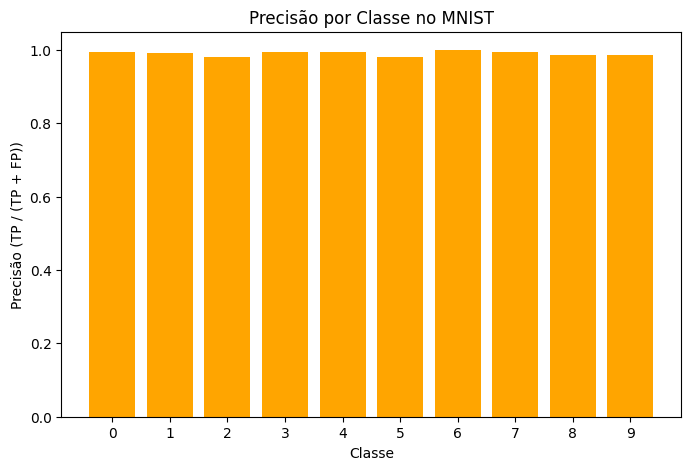

In [76]:

precision_per_class = []

for i in range(10):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    precision = TP / (TP + FP)
    precision_per_class.append(precision)
    print(f"Precisão (classe {i}): {precision:.4f}")

plt.figure(figsize=(8,5))
plt.bar(range(10), precision_per_class, color='orange')
plt.xlabel('Classe')
plt.ylabel('Precisão (TP / (TP + FP))')
plt.title('Precisão por Classe no MNIST')
plt.xticks(range(10))
plt.ylim(0,1.05)
plt.show()



F1-Score (classe 0): 0.9944
F1-Score (classe 1): 0.9952
F1-Score (classe 2): 0.9880
F1-Score (classe 3): 0.9906
F1-Score (classe 4): 0.9934
F1-Score (classe 5): 0.9866
F1-Score (classe 6): 0.9916
F1-Score (classe 7): 0.9892
F1-Score (classe 8): 0.9872
F1-Score (classe 9): 0.9861


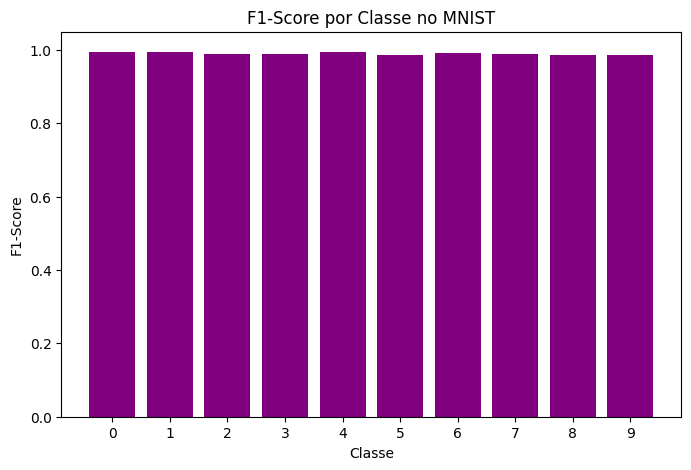

In [77]:
f1_per_class = []

for i in range(10):
    p = precision_per_class[i]
    r = recall_per_class[i]
    if (p + r) > 0:
        f1 = 2 * (p * r) / (p + r)
    else:
        f1 = 0
    f1_per_class.append(f1)
    print(f"F1-Score (classe {i}): {f1:.4f}")

# Plot opcional
plt.figure(figsize=(8,5))
plt.bar(range(10), f1_per_class, color='purple')
plt.xlabel('Classe')
plt.ylabel('F1-Score')
plt.title('F1-Score por Classe no MNIST')
plt.xticks(range(10))
plt.ylim(0,1.05)
plt.show()
